# Analysis of the Evolution of Immigration in Germany

Source data:
* Statistisches Bundesamt
* Bundesamt für Migration und Flüchtlinge

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load immigration statistics from the Statistisches Bundesamt and the Bundesamt für Migration und Flüchtlinge
migration = pd.read_csv("../../data/migration_germany.csv")
migration.year = migration.year.astype(str)

# Scale data to absolute correct numbers
migration["n_migrants"] = migration["n_migrants"]*1000
migration["n_inhabitants"] = migration["n_inhabitants"]*1000

In [3]:
# Load data extracted from counts of articles related or about migration per quarter in der spiegel
art_counter = pd.read_csv("../../data/count_articles_migration_per_quarter.csv")
mig_related = art_counter[art_counter['type']=="related_to_migration"].set_index("quarter").loc[['q1_15', 'q2_15', 'q3_15', 'q4_16', 'q5_16', 
                   'q6_16', 'q7_17', 'q8_17', 'q9_17', 'q10_18', 'q11_18']].reset_index()
mig_about = art_counter[art_counter['type']=="about_migration"].set_index("quarter").loc[['q1_15', 'q2_15', 'q3_15', 'q4_16', 'q5_16', 
                   'q6_16', 'q7_17', 'q8_17', 'q9_17', 'q10_18', 'q11_18']].reset_index()

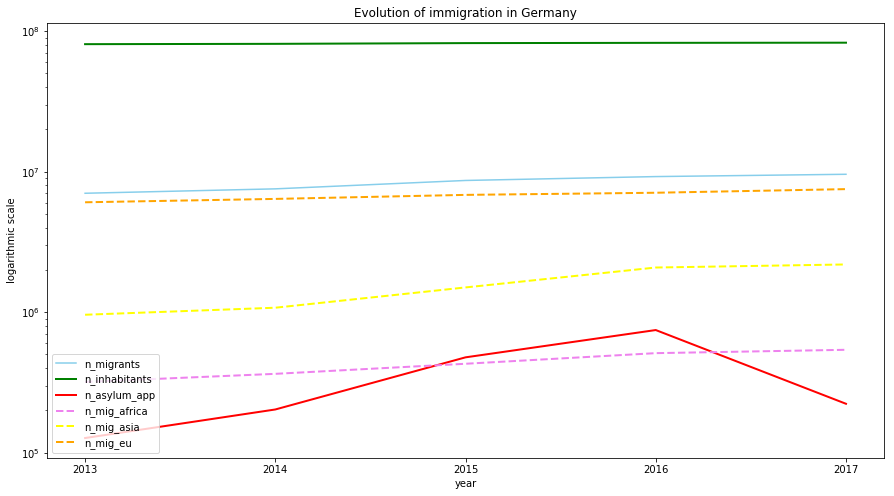

In [4]:
# multiple line plot
_=plt.figure(figsize=(15, 8))
_=plt.plot( 'year', 'n_migrants', data=migration, marker='', markerfacecolor='blue', markersize=12, color='skyblue')
_=plt.plot( 'year', 'n_inhabitants', data=migration, marker='', color='green', linewidth=2)
_=plt.plot( 'year', 'n_asylum_app', data=migration, marker='', color='red', linewidth=2)
_=plt.plot( 'year', 'n_mig_africa', data=migration, marker='', color='violet', linewidth=2, linestyle='dashed')
_=plt.plot( 'year', 'n_mig_asia', data=migration, marker='', color='yellow', linewidth=2, linestyle='dashed')
_=plt.plot( 'year', 'n_mig_eu', data=migration, marker='', color='orange', linewidth=2, linestyle='dashed')
_=plt.yscale('log')
_=plt.title("Evolution of immigration in Germany")
_=plt.ylabel("logarithmic scale")
_=plt.xlabel("year")
_=plt.legend(loc="lower left")

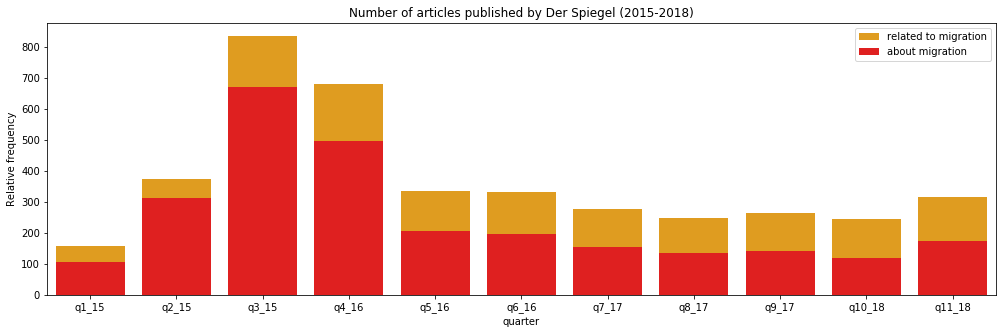

In [31]:
# multiple line plot
_=plt.figure(figsize=(17,5))
_=sns.barplot(y="freq",x="quarter",data=mig_related, color="orange", label="related to migration",
            order=['q1_15', 'q2_15', 'q3_15', 'q4_16', 'q5_16', 
                   'q6_16', 'q7_17', 'q8_17', 'q9_17', 'q10_18', 'q11_18'])
_=sns.barplot(y="freq",x="quarter",data=mig_about, color="red", label="about migration", 
            order=['q1_15', 'q2_15', 'q3_15', 'q4_16', 'q5_16',
                   'q6_16', 'q7_17', 'q8_17', 'q9_17', 'q10_18', 'q11_18'])
_=plt.title("Frequency of migration articles per quarter (2015-2018)")
_=plt.title("Number of articles published by Der Spiegel (2015-2018)")
_=plt.ylabel("Relative frequency")
_=plt.xlabel("quarter")
_=plt.legend(loc="upper right")

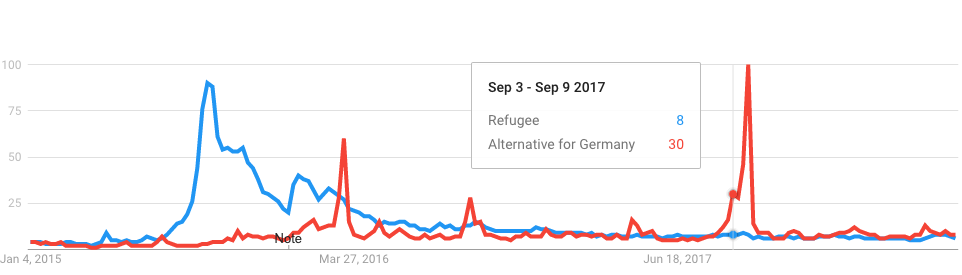

In [5]:
from IPython.display import Image
Image("../../data/refugee_afd_evolution.png")

Google trends shows a higher curiosity/concern in Germany when the European Refugee crisis started in 2015.

It is at the end of 2017, before the national elections when people seem to have a higher concern about the national socialism growing. However, the number of asylum applications was reduced consistently on that time and the grow of immigration from Africa and Asia got estabilized.